## **IMPORT LIBRARIES**

In [115]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [117]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as tsa
import statsmodels.stats.diagnostic as diag

In [118]:
from plotly import tools
import gc
import datetime
import dash
from dash import dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

## **READ THE DATA**

In [119]:
df = pd.read_csv('/Users/work/Desktop/BTC-USD.csv',header=0)
print(df.head())
print(df.tail())

df['Date']=pd.to_datetime(df['Date'])

         Date        Open        High         Low       Close   Adj Close  \
0  2015-11-19  334.678986  335.334015  325.273010  326.148987  326.148987   
1  2015-11-20  326.411011  326.472992  312.217010  322.022003  322.022003   
2  2015-11-21  322.092010  328.158997  319.595001  326.927002  326.927002   
3  2015-11-22  326.975006  327.010010  321.259003  324.536011  324.536011   
4  2015-11-23  324.350006  325.118011  321.290009  323.045990  323.045990   

     Volume  
0  45011100  
1  53152900  
2  28200500  
3  23439400  
4  27478900  
            Date          Open          High           Low         Close  \
1823  2020-11-15  16068.139648  16123.110352  15793.534180  15955.587891   
1824  2020-11-16  15955.577148  16816.181641  15880.706055  16716.111328   
1825  2020-11-17  16685.691406  17782.919922  16564.544922  17645.406250   
1826  2020-11-18  17645.191406  18393.949219  17352.906250  17804.005859   
1827  2020-11-19  18090.171875  18119.460938  17391.650391  17945.328125 

## **EXPLORATORY DATA ANALYSIS**

### **LJung Box Test for White Noise Detection**

### Autocorrelation Plot

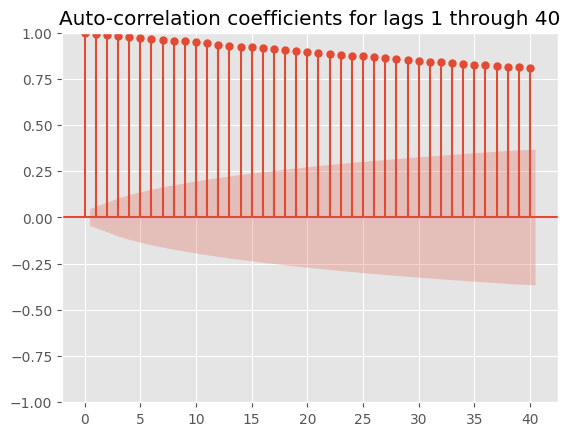

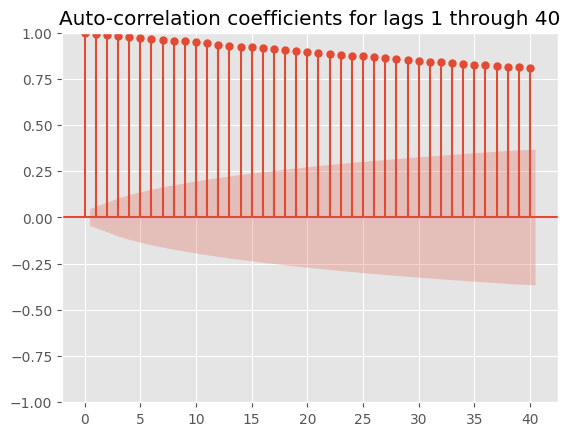

In [120]:
tsa.plot_acf(df['Close'], lags=40, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 40')

**Testing using Ljung Box**

In [121]:
diag.acorr_ljungbox(df['Close'], lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,59590.706583,0.0,58902.349334,0.0


**Price Trend**

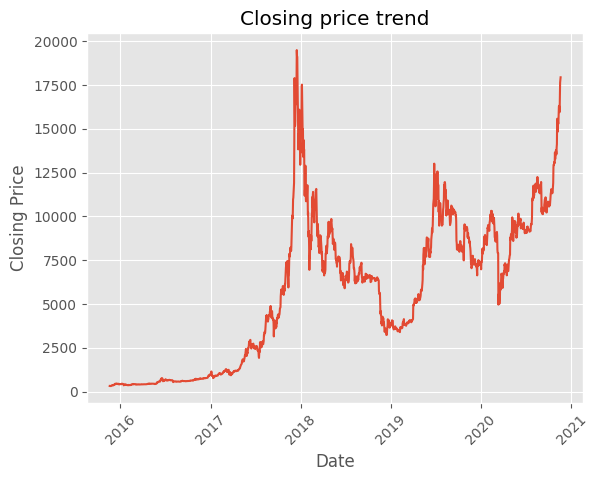

In [122]:
import numpy as np

# Convert the 'Date' column to a numpy array
dates_np = df['Date'].values

# Plot 'Date' against 'Close' using numpy array
plt.plot(dates_np, df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing price trend')
plt.xticks(rotation=45)
plt.savefig('priceTrend.jpg', format='jpg')
plt.show()

In [123]:
import datetime
from datetime import timezone

data = df

start = datetime.datetime(2015,11,19)#2015-11-19
end = datetime.datetime(2020,11,19)#2020-11-19

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = data[(data['Date'] >= start) & (data['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,334.678986,335.334015,325.273010,326.148987,326.148987,45011100
1,2015-11-30,323.014008,323.058014,318.118011,320.045990,320.045990,29362600
2,2015-12-07,377.414001,378.931000,356.562988,362.488007,362.488007,60452200
3,2015-12-14,395.753998,415.562988,389.950012,415.562988,415.562988,57801400
4,2015-12-21,443.877991,465.321014,443.877991,465.321014,465.321014,83121104


## **VISUALIZATION**

**HIGH PRICE MOVEMENT**

In [124]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot

# Create figure for price movement
fig_price = go.Figure()

fig_price.add_trace(
    go.Scatter(x=list(weekly_rows.Date), y=list(weekly_rows.High))
)

# Set title for price movement
fig_price.update_layout(
    title_text="Time series of Price with range slider and selectors"
)

# Add range slider for price movement
fig_price.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# Display the price movement figure
plot(fig_price)

'temp-plot.html'

**Volume Movement**

In [154]:
# Create figure for volume movement
fig_volume = go.Figure()

fig_volume.add_trace(
    go.Scatter(x=list(weekly_rows.Date), y=list(weekly_rows.Volume))
)

# Set title for volume movement
fig_volume.update_layout(
    title_text="Time series of Volume with range slider and selectors"
)

# Add range slider for volume movement
fig_volume.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# Display the volume movement figure
plot(fig_volume)

'temp-plot.html'

In [155]:
df['Daily Lag']=df['Close'].shift(1)
df['Daily Returns']=(df['Daily Lag']/df['Close'])-1
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
13,2015-12-02,361.845001,362.231995,349.464996,359.187012,359.187012,54160500,NaN,NaN
14,2015-12-03,359.330994,370.274994,357.411987,361.045990,361.045990,50714900,359.187012,-0.005149
15,2015-12-04,361.261993,363.515991,355.756989,363.183014,363.183014,35784100,361.045990,-0.005884
16,2015-12-05,363.721008,389.785004,363.229004,388.949005,388.949005,66282200,363.183014,-0.066245
17,2015-12-06,389.554993,402.808990,387.088989,388.782990,388.782990,77762000,388.949005,0.000427



 Mean:  0.0029312068997273837

 Standard deviation:  0.03910831602899909

 Lowest Return:  -0.3716953856106434

 Highest Return:  0.2524716942938108


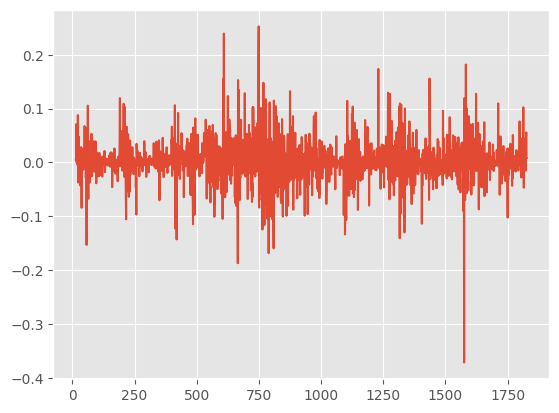

In [172]:
df['Daily Returns'].plot()
mean=df['Daily Returns'].mean()
std=df['Daily Returns'].std()
min=df['Daily Returns'].min()
max=df['Daily Returns'].max()
print("\n Mean: ",mean)
print("\n Standard deviation: ",std)
print("\n Lowest Return: ",min)
print("\n Highest Return: ",max)

In [157]:
# Calculate daily returns
df['Daily Returns'] = df['Close'].pct_change()

# Remove NaN values
df.dropna(inplace=True)

# Calculate volatility (standard deviation of daily returns)
volatility = df['Daily Returns'].std()

# Calculate average daily return
mean_daily_return = df['Daily Returns'].mean()

# Assume a risk-free rate for Sharpe and Sortino ratio calculations
risk_free_rate = 0.05

# Calculate annualized Sharpe ratio
sharpe_ratio = (mean_daily_return - risk_free_rate) / volatility * np.sqrt(252)

# Calculate downside deviation (standard deviation of negative returns)
downside_returns = df['Daily Returns'][df['Daily Returns'] < 0]
downside_deviation = downside_returns.std()

# Calculate Sortino ratio
sortino_ratio = (mean_daily_return - risk_free_rate) / downside_deviation * np.sqrt(252)

# Print the results
print("Volatility:", volatility*100)
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)

Volatility: 3.910831602899909
Sharpe Ratio: -19.10575555791244
Sortino Ratio: -24.401702692860283


## **MODELS FOR CLASSIFICATION**

In [158]:
logRegData=df
logRegData['PriceDifference']=logRegData['Open']-logRegData['Close']
logRegData['UpDown']=np.where(logRegData['PriceDifference']>0,'-1','1')
logRegData.head()
logRegData['LagPrice1']=logRegData['Close'].shift(1)
logRegData['LagPrice2']=logRegData['Close'].shift(2)
logRegData['LagPrice3']=logRegData['Close'].shift(3)
logRegData['LagPrice4']=logRegData['Close'].shift(4)
logRegData['LagPrice5']=logRegData['Close'].shift(5)
logRegData['MA_10']=logRegData['Close'].rolling(window=10).mean()
logRegData['MA_20']=logRegData['Close'].rolling(window=20).mean()
logRegData['STD_10']=logRegData['Close'].rolling(window=10).std()
logRegData['STD_20']=logRegData['Close'].rolling(window=20).std()
#logRegData['MACD_10']=logRegData['Close'].rolling(window=10).macd()
logRegData['EMA_12']=logRegData['Close'].ewm(span=12,adjust=False).mean()
logRegData['EMA_26']=logRegData['Close'].ewm(span=26,adjust=False).mean()
logRegData['MACD']=logRegData['EMA_12']-logRegData['EMA_26']
logRegData['UpperBollinger']=logRegData['MA_20']+2*logRegData['STD_20']
logRegData['LowerBollinger']=logRegData['MA_20']-2*logRegData['STD_20']

logRegData=logRegData.iloc[20:]
logRegData.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns,PriceDifference,...,LagPrice5,MA_10,MA_20,STD_10,STD_20,EMA_12,EMA_26,MACD,UpperBollinger,LowerBollinger
34,2015-12-23,436.720001,444.528992,436.618988,442.401001,442.401001,47161400,436.571991,0.013352,-5.681000,...,463.615997,450.675000,430.624800,10.970552,28.544093,440.411964,421.967013,18.444951,487.712986,373.536614
35,2015-12-24,443.091003,458.455994,443.076996,454.984985,454.984985,57157200,442.401001,0.028445,-11.893982,...,462.321991,451.755298,435.214899,10.790550,24.175002,442.653967,424.412789,18.241178,483.564902,386.864895
36,2015-12-25,454.855011,458.304993,452.075012,455.653015,455.653015,39078500,454.984985,0.001468,-0.798004,...,442.684998,450.788498,438.550099,9.830453,21.955572,444.653821,426.726880,17.926941,482.461244,394.638955
37,2015-12-26,455.756012,457.489014,405.760010,417.273987,417.273987,116166000,455.653015,-0.084229,38.482025,...,438.639008,447.022498,439.974649,14.274881,19.323039,440.441538,426.026665,14.414873,478.620727,401.328571
38,2015-12-27,416.514008,424.006989,408.882996,422.822998,422.822998,53591200,417.273987,0.013298,-6.308990,...,436.571991,443.696997,441.338998,15.730275,16.821625,437.730994,425.789357,11.941637,474.982249,407.695748


## **TRAIN TEST SPLIT**

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#X=logRegData[['MA_10','MA_20','STD_10','STD_20','MACD','UpperBollinger','LowerBollinger']]
X=logRegData[['MA_10','STD_10','MACD','UpperBollinger','LowerBollinger']]
y=logRegData[['UpDown']]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)
y_train=y_train['UpDown'].to_list()
y_test=y_test['UpDown'].to_list()

## **LOGISTIC REGRESSION MODEL** 

In [180]:
#building logistic regression model
#training logistic regression model

from sklearn.linear_model import LogisticRegression
corr_matrix=X.corr()
print("Correlation Matrix:")
print(corr_matrix)

log_model=LogisticRegression(max_iter=150)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(y_pred)

Correlation Matrix:
                   MA_10    STD_10      MACD  UpperBollinger  LowerBollinger
MA_10           1.000000  0.684063  0.252105        0.987948        0.972465
STD_10          0.684063  1.000000  0.279224        0.745600        0.550654
MACD            0.252105  0.279224  1.000000        0.195631        0.115775
UpperBollinger  0.987948  0.745600  0.195631        1.000000        0.946061
LowerBollinger  0.972465  0.550654  0.115775        0.946061        1.000000
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '-1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '-1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '-1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '-1' '1' '1' '-1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '-1' '1' '1' '1' '-1' '1' '1' '1' '1' '1' '1' '1' '-1'
 '1

Confusion Matrix:
[[ 13 186]
 [ 14 236]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.48      0.07      0.12       199
           1       0.56      0.94      0.70       250

    accuracy                           0.55       449
   macro avg       0.52      0.50      0.41       449
weighted avg       0.52      0.55      0.44       449



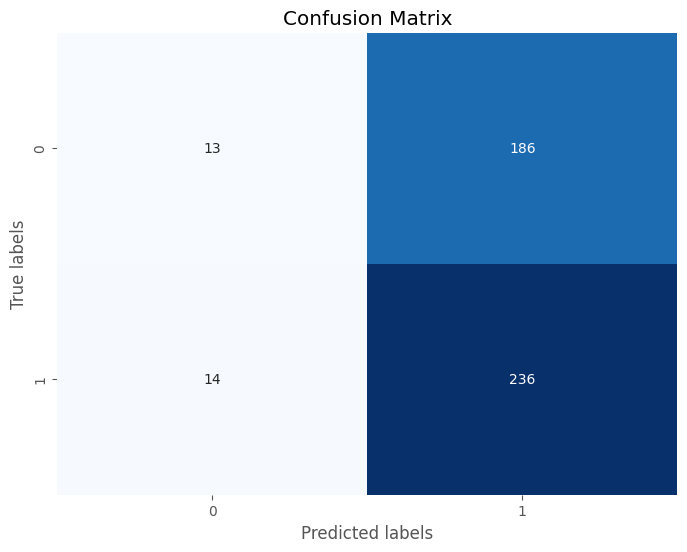

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix using heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [178]:
f1_log_reg = f1_score(y_test,y_pred,zero_division='warn',average=None).mean()*100
print("Accuracy Score (LRM):", accuracy_score(y_test,y_pred)*100)

Accuracy Score (LRM): 55.45657015590201


## **RANDOM FOREST CLASSIFIER**

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '-1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '-1', '1', '1', '1', '1', '1', '1', '-1', '-1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '-1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '-1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '-1', '1', '1', '1', '1', '-1',
       '1', '-1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '-1', '1', '1', '-1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '

Confusion Matrix:
[[ 16 183]
 [ 19 231]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.46      0.08      0.14       199
           1       0.56      0.92      0.70       250

    accuracy                           0.55       449
   macro avg       0.51      0.50      0.42       449
weighted avg       0.51      0.55      0.45       449



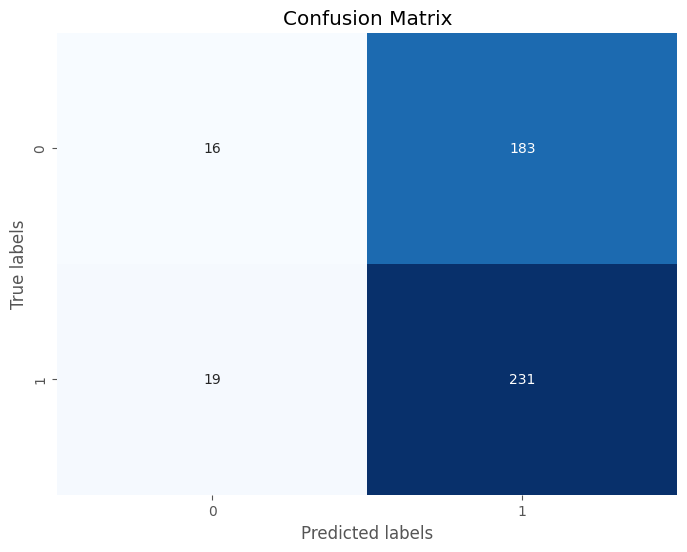

In [192]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualize confusion matrix using heatmap
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [195]:
f1_rf = f1_score(y_test,y_pred_rf,zero_division='warn',average=None).mean()*100
print("Accuracy Score (RF):", accuracy_score(y_test,y_pred_rf)*100)

Accuracy Score (RF): 55.01113585746103


## **COMPARISON**

In [202]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import webbrowser

# Sample data
f1_names = ['LOGISTIC REGRESSION', 'RANDOM FOREST']
f1_data = [f1_log_reg, f1_rf]
f1_df = pd.DataFrame()
f1_df['MODELS'] = f1_names
f1_df['F1 SCORES'] = f1_data

# Create the Plotly figure
fig = px.bar(f1_df, x='MODELS', y='F1 SCORES', color_continuous_scale=px.colors.sequential.Viridis,
             title="F1 Scores Comparison")

# Update layout
fig.update_layout(
    autosize=False,
    width=350,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    )
)
fig.update_traces(marker_color='lightcoral')

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'MODELS=%{x}<br>F1 SCORES=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'lightcoral', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['LOGISTIC REGRESSION', 'RANDOM FOREST'], dtype=object),
              'xaxis': 'x',
              'y': array([40.87126001, 41.62676346]),
              'yaxis': 'y'}],
    'layout': {'autosize': False,
               'barmode': 'relative',
               'height': 500,
               'legend': {'tracegroupgap': 0},
               'margin': {'b': 50, 'l': 50, 'pad': 4, 'r': 50, 't': 100},
               'template': '...',
               'title': {'text': 'F1 Scores Comparison'},
               'width': 350,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'MODELS'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'F1 SCORES'}}}
})

## **TIME SERIES**

In [205]:
timeSeriesData=df[['Date','Close']]
print(timeSeriesData.head())
#print(len(timeSeriesData))

         Date       Close
14 2015-12-03  361.045990
15 2015-12-04  363.183014
16 2015-12-05  388.949005
17 2015-12-06  388.782990
18 2015-12-07  395.536011


In [207]:
train_data=timeSeriesData[0:1371] 
test_data=timeSeriesData[1371:]
print("\nTrain Data Head:")
print(train_data.head())
print("\nTrain Data Tail:")
print(train_data.tail())
print("\nTest Data Head:")
print(test_data.head())


Train Data Head:
         Date       Close
14 2015-12-03  361.045990
15 2015-12-04  363.183014
16 2015-12-05  388.949005
17 2015-12-06  388.782990
18 2015-12-07  395.536011

Train Data Tail:
           Date         Close
1380 2019-08-30   9598.173828
1381 2019-08-31   9630.664063
1382 2019-09-01   9757.970703
1383 2019-09-02  10346.760742
1384 2019-09-03  10623.540039

Test Data Head:
           Date         Close
1385 2019-09-04  10594.493164
1386 2019-09-05  10575.533203
1387 2019-09-06  10353.302734
1388 2019-09-07  10517.254883
1389 2019-09-08  10441.276367


## **SIMPLE MOVING AVERAGE METHOD**

In [208]:
#simple moving average method
timeSeriesData=df[['Date','Close']]
for i in range(0,timeSeriesData.shape[0]-4):
    timeSeriesData.loc[timeSeriesData.index[i+4],'SMA_5'] = np.round(((timeSeriesData.iloc[i,1]+ timeSeriesData.iloc[i+1,1] +timeSeriesData.iloc[i+2,1]+timeSeriesData.iloc[i+3,1]+timeSeriesData.iloc[i+4,1])/5),1)
timeSeriesData=timeSeriesData.iloc[5:]
print(timeSeriesData.head())

         Date       Close  SMA_5
19 2015-12-08  415.562988  390.4
20 2015-12-09  417.562988  401.3
21 2015-12-10  415.479004  406.6
22 2015-12-11  451.937988  419.2
23 2015-12-12  434.997009  427.1


/var/folders/3t/8r5nm7hx0dvf06k56h13q6540000gp/T/ipykernel_23881/40120476.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



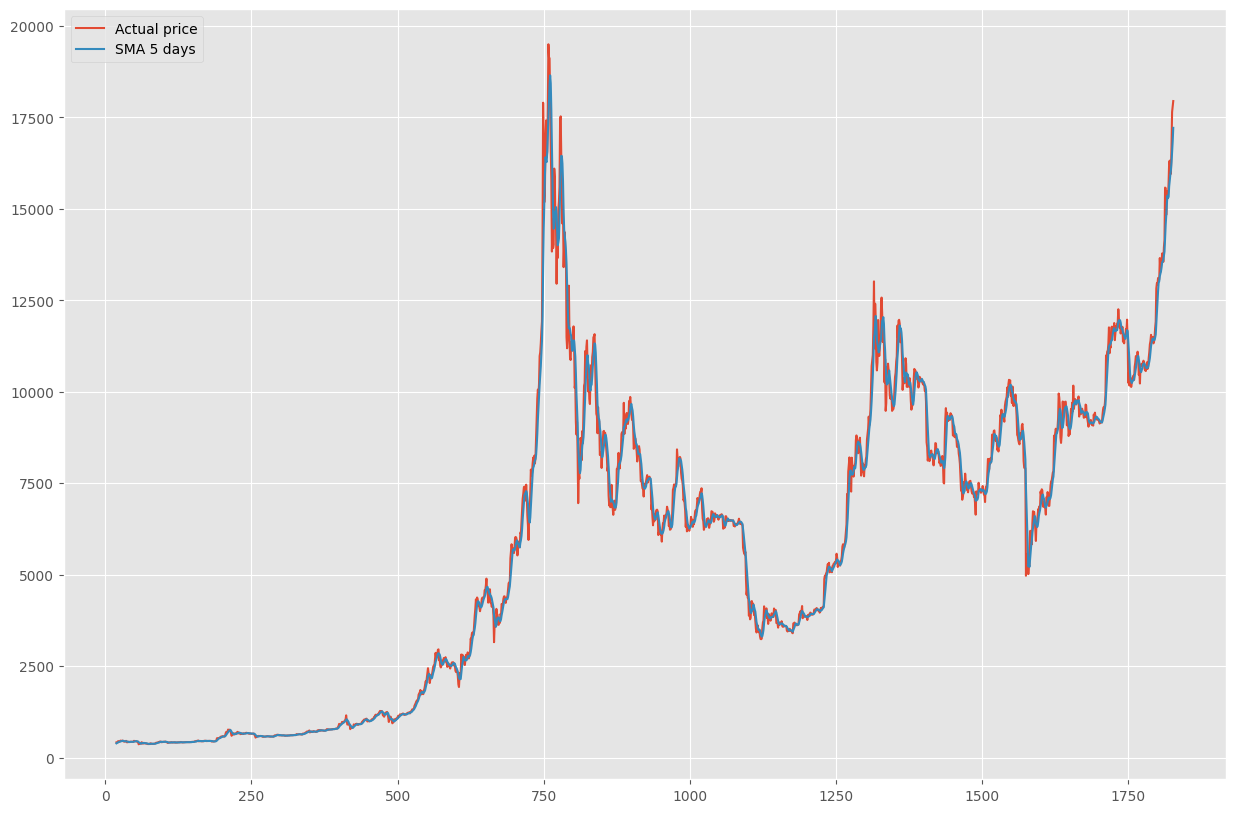

<Figure size 640x480 with 0 Axes>

In [209]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(timeSeriesData['Close'],label='Actual price')
plt.plot(timeSeriesData['SMA_5'],label='SMA 5 days')
plt.legend(loc=2)
plt.show()
plt.savefig('movingAvg.jpg')

In [212]:
train_data=timeSeriesData[0:1371] 
test_data=timeSeriesData[1371:]
print("\nTrain Data Head:")
print(train_data.head())
print("\nTrain Data Tail:")
print(train_data.tail())
print("\nTest Data Head:")
print(test_data.head())


Train Data Head:
         Date       Close  SMA_5
19 2015-12-08  415.562988  390.4
20 2015-12-09  417.562988  401.3
21 2015-12-10  415.479004  406.6
22 2015-12-11  451.937988  419.2
23 2015-12-12  434.997009  427.1

Train Data Tail:
           Date         Close    SMA_5
1385 2019-09-04  10594.493164  10190.7
1386 2019-09-05  10575.533203  10379.7
1387 2019-09-06  10353.302734  10498.7
1388 2019-09-07  10517.254883  10532.8
1389 2019-09-08  10441.276367  10496.4

Test Data Head:
           Date         Close    SMA_5
1390 2019-09-09  10334.974609  10444.5
1391 2019-09-10  10115.975586  10352.6
1392 2019-09-11  10178.372070  10317.6
1393 2019-09-12  10410.126953  10296.1
1394 2019-09-13  10360.546875  10280.0


In [214]:
import math
y=test_data['Close'].to_list()
y_hat=test_data['SMA_5'].to_list()
sum_=0
for i in range (0,len(test_data)):  
  diff=y[i]-y_hat[i]
  squared_diff=diff**2  
  sum_=sum_+squared_diff
rmse=math.sqrt(sum_/len(test_data))
print("Root Mean Square Error (SMA): ",rmse)

Root Mean Square Error (SMA):  338.67514051732445


## **Augmented Dicky Fuller Test**


In [215]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='green',label='Bitcoin Data')
    mean_ = plt.plot(rolmean, color='red', label='Rolling Mean')
    std_ = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('Time(Days)',fontsize=24)
    plt.ylabel('$(Dollar)',fontsize=24)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

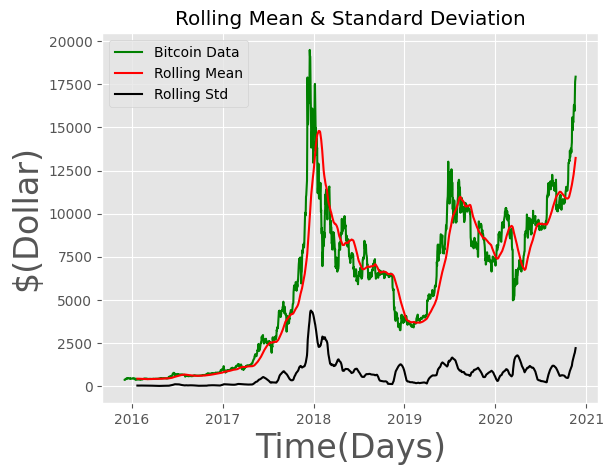

Results of Dickey-Fuller Test:
Test Statistic                   -1.027795
p-value                           0.742992
#Lags Used                       20.000000
Number of Observations Used    1793.000000
Critical Value (1%)              -3.434002
Critical Value (5%)              -2.863153
Critical Value (10%)             -2.567629
dtype: float64


In [216]:
indexed_data = df.set_index('Date')

daily_target_prices = indexed_data['Close']

test_stationarity(daily_target_prices)

Since the p-value is larger than 0.05 , the the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected.The Daily Time Series is not stationary . 

In order to apply ARIMA , we have to transform the time-series into a stationary one.

In [217]:
daily_target_prices_log = np.log(daily_target_prices)

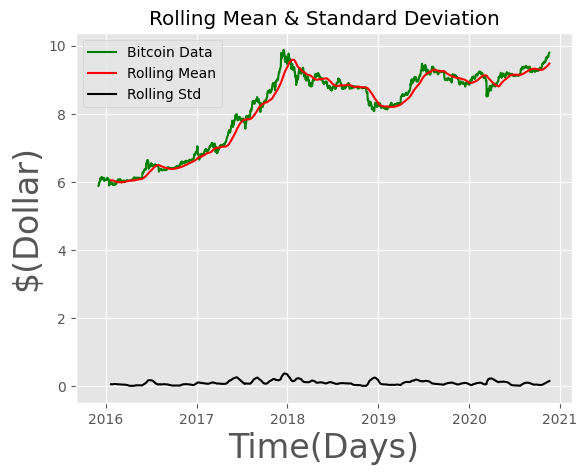

Results of Dickey-Fuller Test:
Test Statistic                   -1.360976
p-value                           0.600835
#Lags Used                        0.000000
Number of Observations Used    1813.000000
Critical Value (1%)              -3.433962
Critical Value (5%)              -2.863136
Critical Value (10%)             -2.567619
dtype: float64


In [218]:
test_stationarity(daily_target_prices_log)

The series is still non-stationary.

**Decomposition of the series**

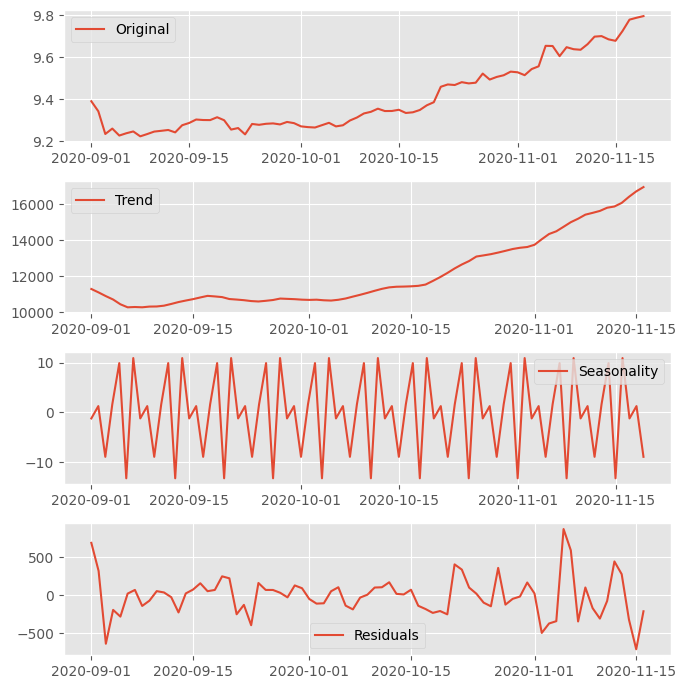

In [219]:
decomposition = seasonal_decompose(daily_target_prices)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(7,7))
plt.subplot(411)
plt.plot(daily_target_prices_log[-80:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend[-80:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[-80:],label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual[-80:], label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Removing Trend and Seasonality with Differencing**

In [220]:
daily_prices_log_diff = daily_target_prices_log - daily_target_prices_log.shift()

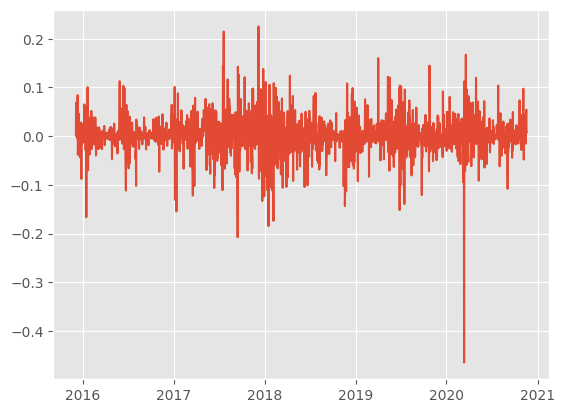

In [221]:
plt.plot(daily_prices_log_diff)

In [222]:
daily_prices_log_diff.dropna(inplace=True)

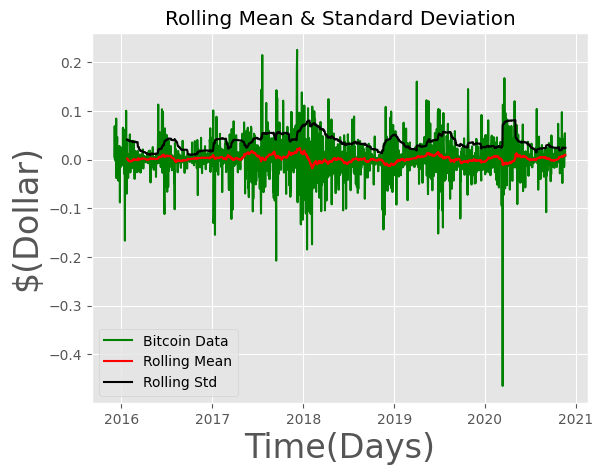

Results of Dickey-Fuller Test:
Test Statistic                  -29.564591
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1811.000000
Critical Value (1%)              -3.433966
Critical Value (5%)              -2.863137
Critical Value (10%)             -2.567620
dtype: float64


In [223]:
test_stationarity(daily_prices_log_diff)

Since the p-value is less than 0.05 , the series is stationary

## **Auto Regressive Integrated Moving Average Model : ARIMA MODEL**

### **TRAIN TEST SPLIT**

In [224]:
size = int(len(daily_target_prices_log)*(0.7))
train, test = daily_target_prices_log[0:size], daily_target_prices_log[size:len(daily_target_prices_log)]

train_log_diff, test_log_diff = daily_prices_log_diff[0:size], daily_prices_log_diff[size:len(daily_prices_log_diff)]

#predictions = list()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AttributeError: 'function' object has no attribute 'fittedvalues'

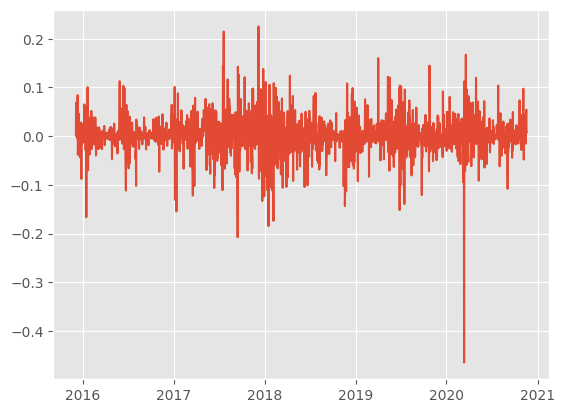

In [225]:
from statsmodels.tsa.arima.model import ARIMA
#Model Fitting
model = ARIMA(daily_target_prices_log,order=(2,1,0))
results_ARIMA = model.fit
plt.plot(daily_prices_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-daily_prices_log_diff)**2))
plt.show()

## **MODEL TESTING**

Predicted vs Expected values
predicted = 7993.182263,   expected = 8052.543945,   error = 0.737179  %
predicted = 8055.621688,   expected = 8673.215820,   error = 7.120705  %
predicted = 8678.961071,   expected = 8805.778320,   error = 1.440159  %


/var/folders/3t/8r5nm7hx0dvf06k56h13q6540000gp/T/ipykernel_23881/2925088278.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 8823.508792,   expected = 8719.961914,   error = 1.187469  %
predicted = 8722.747435,   expected = 8659.487305,   error = 0.730530  %
predicted = 8656.949856,   expected = 8319.472656,   error = 4.056473  %
predicted = 8315.756519,   expected = 8574.501953,   error = 3.017615  %
predicted = 8567.389967,   expected = 8564.016602,   error = 0.039390  %
predicted = 8570.506608,   expected = 8742.958008,   error = 1.972461  %
predicted = 8743.786722,   expected = 8208.995117,   error = 6.514702  %
predicted = 8210.537375,   expected = 7707.770996,   error = 6.522851  %
predicted = 7692.023133,   expected = 7824.231445,   error = 1.689729  %
predicted = 7812.982190,   expected = 7822.023438,   error = 0.115587  %
predicted = 7824.876216,   expected = 8043.951172,   error = 2.723474  %
predicted = 8045.451137,   expected = 7954.127930,   error = 1.148123  %
predicted = 7959.012741,   expected = 7688.077148,   error = 3.524101  %
predicted = 7684.173341,   expected = 8000.329590, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 11016.998902,   expected = 11790.916992,   error = 6.563680  %
predicted = 11803.863411,   expected = 13016.231445,   error = 9.314278  %
predicted = 13059.430674,   expected = 11182.806641,   error = 16.781333  %
predicted = 11199.105661,   expected = 12407.332031,   error = 9.738003  %
predicted = 12350.909401,   expected = 11959.371094,   error = 3.273904  %
predicted = 11999.740499,   expected = 10817.155273,   error = 10.932497  %
predicted = 10808.308257,   expected = 10583.134766,   error = 2.127663  %
predicted = 10555.150442,   expected = 10801.677734,   error = 2.282306  %
predicted = 10795.551212,   expected = 11961.269531,   error = 9.745774  %
predicted = 11967.660549,   expected = 11215.437500,   error = 6.707033  %
predicted = 11244.521466,   expected = 10978.459961,   error = 2.423487  %
predicted = 10963.068925,   expected = 11208.550781,   error = 2.190130  %
predicted = 11202.804988,   expected = 11450.846680,   error = 2.166143  %
predicted = 11455.46439

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10872.497139,   expected = 9477.641602,   error = 14.717327  %
predicted = 9501.000527,   expected = 9693.802734,   error = 1.988922  %
predicted = 9657.816291,   expected = 10666.482422,   error = 9.456408  %
predicted = 10663.670446,   expected = 10530.732422,   error = 1.262382  %
predicted = 10550.711339,   expected = 10767.139648,   error = 2.010082  %
predicted = 10762.540629,   expected = 10599.105469,   error = 1.541971  %
predicted = 10605.100625,   expected = 10343.106445,   error = 2.533032  %
predicted = 10341.920992,   expected = 9900.767578,   error = 4.455750  %
predicted = 9899.155348,   expected = 9811.925781,   error = 0.889016  %
predicted = 9804.014690,   expected = 9911.841797,   error = 1.087861  %
predicted = 9909.353926,   expected = 9870.303711,   error = 0.395633  %
predicted = 9872.577929,   expected = 9477.677734,   error = 4.166635  %
predicted = 9479.661420,   expected = 9552.860352,   error = 0.766251  %
predicted = 9544.740134,   expected = 9

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10523.845720,   expected = 10821.726563,   error = 2.752618  %
predicted = 10822.323519,   expected = 10970.184570,   error = 1.347845  %
predicted = 10975.652667,   expected = 11805.653320,   error = 7.030536  %
predicted = 11804.316267,   expected = 11478.168945,   error = 2.841458  %
predicted = 11498.088873,   expected = 11941.968750,   error = 3.716974  %
predicted = 11931.159055,   expected = 11966.407227,   error = 0.294559  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 11976.857004,   expected = 11862.936523,   error = 0.960306  %
predicted = 11864.185209,   expected = 11354.024414,   error = 4.493216  %
predicted = 11355.180691,   expected = 11523.579102,   error = 1.461338  %
predicted = 11511.213639,   expected = 11382.616211,   error = 1.129770  %
predicted = 11387.379592,   expected = 10895.830078,   error = 4.511354  %
predicted = 10896.131084,   expected = 10051.704102,   error = 8.400834  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10046.045802,   expected = 10311.545898,   error = 2.574785  %
predicted = 10291.660153,   expected = 10374.338867,   error = 0.796954  %
predicted = 10379.698696,   expected = 10231.744141,   error = 1.446035  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10233.949518,   expected = 10345.810547,   error = 1.081221  %
predicted = 10342.014434,   expected = 10916.053711,   error = 5.258670  %
predicted = 10915.147784,   expected = 10763.232422,   error = 1.411429  %
predicted = 10776.397594,   expected = 10138.049805,   error = 6.296554  %
predicted = 10138.815286,   expected = 10131.055664,   error = 0.076592  %
predicted = 10119.193232,   expected = 10407.964844,   error = 2.774525  %
predicted = 10406.178655,   expected = 10159.960938,   error = 2.423412  %
predicted = 10166.650132,   expected = 10138.517578,   error = 0.277482  %
predicted = 10134.041169,   expected = 10370.820313,   error = 2.283128  %
predicted = 10368.963517,   expected = 10185.500000,   error = 1.801222  %
predicted = 10190.963063,   expected = 9754.422852,   error = 4.475305  %
predicted = 9753.758017,   expected = 9510.200195,   error = 2.561017  %
predicted = 9503.971721,   expected = 9598.173828,   error = 0.981459  %
predicted = 9593.254916,   exp

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10174.078038,   expected = 10410.126953,   error = 2.267493  %
predicted = 10410.207973,   expected = 10360.546875,   error = 0.479329  %
predicted = 10365.005813,   expected = 10358.048828,   error = 0.067165  %
predicted = 10357.164588,   expected = 10347.712891,   error = 0.091341  %
predicted = 10347.715775,   expected = 10276.793945,   error = 0.690116  %
predicted = 10276.936851,   expected = 10241.272461,   error = 0.348242  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10240.160775,   expected = 10198.248047,   error = 0.410980  %
predicted = 10197.806708,   expected = 10266.415039,   error = 0.668279  %
predicted = 10265.313863,   expected = 10181.641602,   error = 0.821795  %
predicted = 10183.266610,   expected = 10019.716797,   error = 1.632280  %
predicted = 10018.954660,   expected = 10070.392578,   error = 0.510784  %
predicted = 10067.239359,   expected = 9729.324219,   error = 3.473161  %
predicted = 9731.808099,   expected = 8620.566406,   error = 12.890588  %
predicted = 8618.160554,   expected = 8486.993164,   error = 1.545511  %
predicted = 8468.493855,   expected = 8118.967773,   error = 4.305056  %
predicted = 8116.967970,   expected = 8251.845703,   error = 1.634516  %
predicted = 8244.088379,   expected = 8245.915039,   error = 0.022152  %
predicted = 8248.667588,   expected = 8104.185547,   error = 1.782808  %
predicted = 8104.350573,   expected = 8293.868164,   error = 2.285033  %
predicted = 8290.523345,   expected = 8

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 7974.652365,   expected = 7988.560547,   error = 0.174101  %
predicted = 7985.881307,   expected = 8222.078125,   error = 2.872714  %
predicted = 8221.828273,   expected = 8243.720703,   error = 0.265565  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 8248.452843,   expected = 8078.203125,   error = 2.107520  %
predicted = 8079.016508,   expected = 7514.671875,   error = 7.509904  %
predicted = 7512.598263,   expected = 7493.488770,   error = 0.255015  %
predicted = 7482.800669,   expected = 8660.700195,   error = 13.600512  %
predicted = 8658.024453,   expected = 9244.972656,   error = 6.348837  %
predicted = 9266.499287,   expected = 9551.714844,   error = 2.986014  %
predicted = 9563.295278,   expected = 9256.148438,   error = 3.318301  %
predicted = 9260.177695,   expected = 9427.687500,   error = 1.776786  %
predicted = 9423.306357,   expected = 9205.726563,   error = 2.363527  %
predicted = 9208.019511,   expected = 9199.584961,   error = 0.091684  %
predicted = 9195.937915,   expected = 9261.104492,   error = 0.703659  %
predicted = 9261.146744,   expected = 9324.717773,   error = 0.681747  %
predicted = 9325.893812,   expected = 9235.354492,   error = 0.980356  %
predicted = 9236.188883,   expected = 9412.612305,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 8760.982245,   expected = 8815.662109,   error = 0.620258  %
predicted = 8811.061256,   expected = 8808.262695,   error = 0.031772  %
predicted = 8809.176557,   expected = 8708.094727,   error = 1.160780  %
predicted = 8707.789382,   expected = 8491.992188,   error = 2.541185  %
predicted = 8490.010369,   expected = 8550.760742,   error = 0.710467  %
predicted = 8547.452553,   expected = 8577.975586,   error = 0.355830  %
predicted = 8578.969044,   expected = 8309.286133,   error = 3.245561  %
predicted = 8309.198587,   expected = 8206.145508,   error = 1.255804  %
predicted = 8201.812773,   expected = 8027.268066,   error = 2.174397  %
predicted = 8025.266866,   expected = 7642.750000,   error = 5.004964  %
predicted = 7638.994458,   expected = 7296.577637,   error = 4.692841  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 7289.329593,   expected = 7397.796875,   error = 1.466211  %
predicted = 7392.493750,   expected = 7047.916992,   error = 4.889058  %
predicted = 7048.562214,   expected = 7146.133789,   error = 1.365376  %
predicted = 7140.342252,   expected = 7218.371094,   error = 1.080976  %
predicted = 7220.305757,   expected = 7531.663574,   error = 4.133985  %
predicted = 7533.963219,   expected = 7463.105957,   error = 0.949434  %
predicted = 7468.465537,   expected = 7761.243652,   error = 3.772309  %
predicted = 7760.770262,   expected = 7569.629883,   error = 2.525095  %
predicted = 7574.636768,   expected = 7424.292480,   error = 2.025032  %
predicted = 7420.597151,   expected = 7321.988281,   error = 1.346750  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 7319.150706,   expected = 7320.145508,   error = 0.013590  %
predicted = 7318.299526,   expected = 7252.034668,   error = 0.913742  %
predicted = 7251.824989,   expected = 7448.307617,   error = 2.637950  %
predicted = 7447.537731,   expected = 7546.996582,   error = 1.317860  %
predicted = 7550.914170,   expected = 7556.237793,   error = 0.070453  %
predicted = 7558.066343,   expected = 7564.345215,   error = 0.083006  %
predicted = 7564.534665,   expected = 7400.899414,   error = 2.211018  %
predicted = 7400.615950,   expected = 7278.119629,   error = 1.683076  %
predicted = 7274.898191,   expected = 7217.427246,   error = 0.796280  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 7215.057736,   expected = 7243.134277,   error = 0.387630  %
predicted = 7242.105719,   expected = 7269.684570,   error = 0.379368  %
predicted = 7270.229688,   expected = 7124.673828,   error = 2.042983  %
predicted = 7124.741378,   expected = 7152.301758,   error = 0.385336  %
predicted = 7149.766791,   expected = 6932.480469,   error = 3.134323  %
predicted = 6932.382691,   expected = 6640.515137,   error = 4.395255  %
predicted = 6635.769132,   expected = 7276.802734,   error = 8.809276  %
predicted = 7272.517702,   expected = 7202.844238,   error = 0.967305  %
predicted = 7214.136782,   expected = 7218.816406,   error = 0.064825  %
predicted = 7217.561386,   expected = 7191.158691,   error = 0.367155  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 7191.401064,   expected = 7511.588867,   error = 4.262584  %
predicted = 7511.458348,   expected = 7355.628418,   error = 2.118513  %
predicted = 7361.089294,   expected = 7322.532227,   error = 0.526554  %
predicted = 7319.852870,   expected = 7275.155762,   error = 0.614380  %
predicted = 7274.549842,   expected = 7238.966797,   error = 0.491549  %
predicted = 7238.122987,   expected = 7290.088379,   error = 0.712823  %
predicted = 7289.499204,   expected = 7317.990234,   error = 0.389329  %
predicted = 7318.904233,   expected = 7422.652832,   error = 1.397729  %
predicted = 7423.231852,   expected = 7292.995117,   error = 1.785778  %
predicted = 7294.697819,   expected = 7193.599121,   error = 1.405398  %
predicted = 7191.332890,   expected = 7200.174316,   error = 0.122795  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 7198.477410,   expected = 6985.470215,   error = 3.049289  %
predicted = 6985.411599,   expected = 7344.884277,   error = 4.894191  %
predicted = 7341.062159,   expected = 7410.656738,   error = 0.939115  %
predicted = 7417.117015,   expected = 7411.317383,   error = 0.078254  %
predicted = 7412.460016,   expected = 7769.219238,   error = 4.591957  %
predicted = 7769.358377,   expected = 8163.692383,   error = 4.830339  %
predicted = 8170.972184,   expected = 8079.862793,   error = 1.127611  %
predicted = 8086.672604,   expected = 7879.071289,   error = 2.634845  %
predicted = 7877.469458,   expected = 8166.554199,   error = 3.539862  %
predicted = 8163.405676,   expected = 8037.537598,   error = 1.566003  %
predicted = 8042.270533,   expected = 8192.494141,   error = 1.833674  %
predicted = 8190.353277,   expected = 8144.194336,   error = 0.566771  %
predicted = 8146.821134,   expected = 8827.764648,   error = 7.713657  %
predicted = 8826.999603,   expected = 8807.010742, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 9685.864188,   expected = 9663.181641,   error = 0.234732  %
predicted = 9664.688146,   expected = 9924.515625,   error = 2.618037  %
predicted = 9923.703430,   expected = 9650.174805,   error = 2.834442  %
predicted = 9655.525904,   expected = 9341.705078,   error = 3.359353  %
predicted = 9337.213991,   expected = 8820.522461,   error = 5.857834  %
predicted = 8815.235299,   expected = 8784.494141,   error = 0.349948  %
predicted = 8774.746219,   expected = 8672.455078,   error = 1.179495  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 8671.800018,   expected = 8599.508789,   error = 0.840644  %
predicted = 8597.362163,   expected = 8562.454102,   error = 0.407688  %
predicted = 8561.041815,   expected = 8869.669922,   error = 3.479590  %
predicted = 8868.799327,   expected = 8787.786133,   error = 0.921884  %
predicted = 8793.897303,   expected = 8755.246094,   error = 0.441463  %
predicted = 8753.677960,   expected = 9078.762695,   error = 3.580716  %
predicted = 9077.923826,   expected = 9122.545898,   error = 0.489141  %
predicted = 9128.936446,   expected = 8909.954102,   error = 2.457727  %
predicted = 8910.881604,   expected = 8108.116211,   error = 9.900763  %
predicted = 8104.211591,   expected = 7923.644531,   error = 2.278838  %
predicted = 7909.205336,   expected = 7909.729492,   error = 0.006627  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 7906.249889,   expected = 7911.430176,   error = 0.065479  %
predicted = 7911.168020,   expected = 4970.788086,   error = 59.153194  %
predicted = 4967.886014,   expected = 5563.707031,   error = 10.709065  %
predicted = 5501.860572,   expected = 5200.366211,   error = 5.797560  %
predicted = 5225.269413,   expected = 5392.314941,   error = 3.097844  %
predicted = 5376.740151,   expected = 5014.479980,   error = 7.224282  %
predicted = 5028.886326,   expected = 5225.629395,   error = 3.764964  %
predicted = 5207.831902,   expected = 5238.438477,   error = 0.584269  %
predicted = 5245.271063,   expected = 6191.192871,   error = 15.278507  %
predicted = 6167.020349,   expected = 6198.778320,   error = 0.512326  %
predicted = 6235.673971,   expected = 6185.066406,   error = 0.818222  %
predicted = 6185.656318,   expected = 5830.254883,   error = 6.095813  %
predicted = 5837.925609,   expected = 6416.314941,   error = 9.014354  %
predicted = 6387.316388,   expected = 6734.80371

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 6693.200831,   expected = 6716.440430,   error = 0.346011  %
predicted = 6713.783395,   expected = 6469.798340,   error = 3.771138  %
predicted = 6476.781448,   expected = 6242.193848,   error = 3.758095  %
predicted = 6239.611520,   expected = 5922.042969,   error = 5.362483  %
predicted = 5921.873347,   expected = 6429.841797,   error = 7.900170  %
predicted = 6405.684321,   expected = 6438.644531,   error = 0.511912  %
predicted = 6455.995280,   expected = 6606.776367,   error = 2.282219  %
predicted = 6602.942875,   expected = 6793.624512,   error = 2.806773  %
predicted = 6794.999770,   expected = 6733.387207,   error = 0.915031  %
predicted = 6741.179278,   expected = 6867.527344,   error = 1.839790  %
predicted = 6862.175533,   expected = 6791.129395,   error = 1.046161  %
predicted = 6797.529322,   expected = 7271.781250,   error = 6.521812  %
predicted = 7256.789399,   expected = 7176.414551,   error = 1.119986  %
predicted = 7195.735090,   expected = 7334.098633, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 9137.061668,   expected = 9190.854492,   error = 0.585286  %
predicted = 9193.019130,   expected = 9137.993164,   error = 0.602167  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 9140.932948,   expected = 9228.325195,   error = 0.947000  %
predicted = 9224.208683,   expected = 9123.410156,   error = 1.104834  %
predicted = 9129.119543,   expected = 9087.303711,   error = 0.460157  %
predicted = 9084.694256,   expected = 9132.488281,   error = 0.523341  %
predicted = 9130.105663,   expected = 9073.942383,   error = 0.618951  %
predicted = 9076.957964,   expected = 9375.474609,   error = 3.184016  %
predicted = 9365.594373,   expected = 9252.277344,   error = 1.224747  %
predicted = 9265.723269,   expected = 9428.333008,   error = 1.724692  %
predicted = 9419.485705,   expected = 9277.967773,   error = 1.525312  %
predicted = 9287.832602,   expected = 9278.807617,   error = 0.097264  %
predicted = 9273.672354,   expected = 9240.346680,   error = 0.360654  %
predicted = 9241.368919,   expected = 9276.500000,   error = 0.378711  %
predicted = 9274.240423,   expected = 9243.614258,   error = 0.331322  %
predicted = 9245.703164,   expected = 9243.213867, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 11604.143137,   expected = 11681.825195,   error = 0.664982  %
predicted = 11669.413088,   expected = 11664.847656,   error = 0.039138  %
predicted = 11668.456761,   expected = 11774.595703,   error = 0.901423  %
predicted = 11771.057607,   expected = 11366.134766,   error = 3.562538  %
predicted = 11380.627805,   expected = 11488.363281,   error = 0.937779  %
predicted = 11470.749482,   expected = 11323.397461,   error = 1.301306  %
predicted = 11332.103883,   expected = 11542.500000,   error = 1.822795  %
predicted = 11530.599903,   expected = 11506.865234,   error = 0.206265  %
predicted = 11515.672694,   expected = 11711.505859,   error = 1.672143  %
predicted = 11704.637635,   expected = 11680.820313,   error = 0.203901  %
predicted = 11688.999304,   expected = 11970.478516,   error = 2.351445  %
predicted = 11961.424830,   expected = 11414.034180,   error = 4.795768  %
predicted = 11439.010501,   expected = 10245.296875,   error = 11.651333  %
predicted = 10256.592781

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10442.402670,   expected = 10323.755859,   error = 1.149260  %
predicted = 10328.379913,   expected = 10680.837891,   error = 3.299909  %
predicted = 10666.682860,   expected = 10796.951172,   error = 1.206529  %
predicted = 10806.808396,   expected = 10974.905273,   error = 1.531648  %
predicted = 10974.304144,   expected = 10948.990234,   error = 0.231199  %
predicted = 10956.059391,   expected = 10944.585938,   error = 0.104832  %
predicted = 10943.783752,   expected = 11094.346680,   error = 1.357114  %
predicted = 11090.130846,   expected = 10938.271484,   error = 1.388331  %
predicted = 10947.744880,   expected = 10462.259766,   error = 4.640347  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10469.475734,   expected = 10538.459961,   error = 0.654595  %
predicted = 10519.859875,   expected = 10225.864258,   error = 2.875020  %
predicted = 10236.814285,   expected = 10745.548828,   error = 4.734375  %
predicted = 10719.353387,   expected = 10702.290039,   error = 0.159436  %
predicted = 10722.540690,   expected = 10754.437500,   error = 0.296592  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 10751.442195,   expected = 10774.426758,   error = 0.213325  %
predicted = 10775.759970,   expected = 10721.327148,   error = 0.507706  %
predicted = 10723.498034,   expected = 10848.830078,   error = 1.155259  %
predicted = 10843.378681,   expected = 10787.618164,   error = 0.516894  %
predicted = 10793.884963,   expected = 10623.330078,   error = 1.605475  %
predicted = 10625.653630,   expected = 10585.164063,   error = 0.382512  %
predicted = 10580.379977,   expected = 10565.493164,   error = 0.140900  %
predicted = 10564.667494,   expected = 10684.428711,   error = 1.120895  %
predicted = 10680.430960,   expected = 10804.000977,   error = 1.143743  %
predicted = 10805.043733,   expected = 10621.664063,   error = 1.726468  %
predicted = 10630.871869,   expected = 10679.136719,   error = 0.451955  %
predicted = 10671.040970,   expected = 10923.627930,   error = 2.312299  %
predicted = 10918.938333,   expected = 11079.465820,   error = 1.448874  %
predicted = 11084.131811,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 11435.544755,   expected = 11429.506836,   error = 0.052827  %
predicted = 11424.775654,   expected = 11495.349609,   error = 0.613935  %
predicted = 11493.682869,   expected = 11322.123047,   error = 1.515262  %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted = 11329.148493,   expected = 11358.101563,   error = 0.254911  %
predicted = 11350.919320,   expected = 11483.359375,   error = 1.153322  %
predicted = 11481.235144,   expected = 11742.037109,   error = 2.221096  %
predicted = 11739.558958,   expected = 11916.334961,   error = 1.483476  %
predicted = 11921.140945,   expected = 12823.689453,   error = 7.038134  %
predicted = 12805.541645,   expected = 12965.891602,   error = 1.236706  %
predicted = 12997.042836,   expected = 12931.539063,   error = 0.506543  %
predicted = 12937.652525,   expected = 13108.062500,   error = 1.300039  %
predicted = 13102.108935,   expected = 13031.173828,   error = 0.544349  %
predicted = 13039.661248,   expected = 13075.248047,   error = 0.272169  %
predicted = 13071.269296,   expected = 13654.218750,   error = 4.269372  %
predicted = 13640.330598,   expected = 13271.285156,   error = 2.780781  %
predicted = 13302.385003,   expected = 13437.882813,   error = 1.008327  %
predicted = 13419.399590,

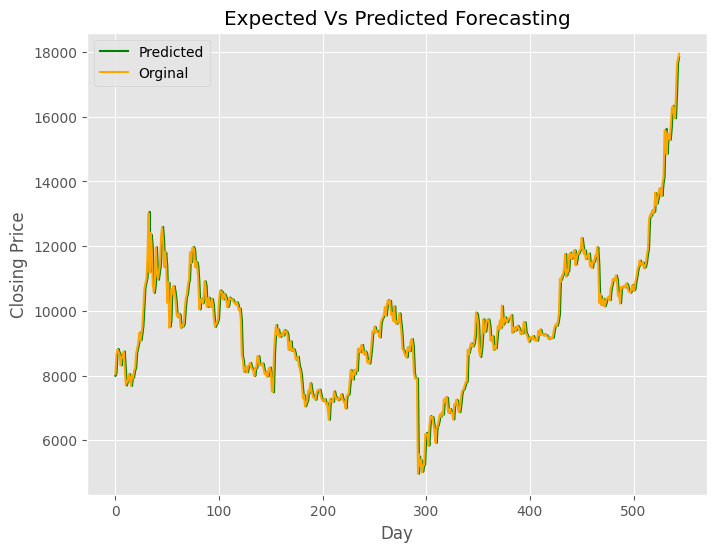

In [227]:
history = [price for price in train]

original_values = list()
errors = list()
predictions = list()

print('Predicted vs Expected values')

for t in range(len(test)):
  model = ARIMA(history,order=(2,1,0))
  model_fit = model.fit()
    
  output = model_fit.forecast()
    
  pred = output[0]
    
        
  original_value = test[t]
  history.append(original_value)
    
  pred = np.exp(pred)
    
    
  original_value = np.exp(original_value)
    
  # Calculating the error
  error = ((abs(pred - original_value)) / original_value) * 100
  errors.append(error)
  print('predicted = %f,   expected = %f,   error = %f ' % (pred, original_value, error), '%')
    
  predictions.append(float(pred))
  original_values.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles: %f '% (sum(errors)/float(len(errors))), '%')
plt.figure(figsize=(8, 6))
test_day = [t for t in range(len(test))]
labels={'Orginal','Predicted'}
print(len(test_day))
print(len(predictions))
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, original_values, color = 'orange')
plt.title('Expected Vs Predicted Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()